In [273]:
import pandas as pd
import csv
from matplotlib import pyplot as plt
import os
import numpy as np
from scipy import stats


In [274]:
current_folder = os.getcwd()
csv_list = os.listdir(current_folder)
to_remove = list()
for i in range(len(csv_list)):
    if csv_list[i][-3:] != 'csv':
        to_remove.append(i)
temp = list()
for i in range(len(csv_list)):
    if i not in to_remove:
        temp.append(csv_list[i])
csv_list = temp


In [275]:
V_mm = list()
ADC_0 = list()
ADC_1 = list()
ADC_2 = list()


In [276]:
for i in csv_list:
    with open(i, "r") as f:
        csv_reader = csv.reader(f, delimiter=',')
        ADC_0_temp = list()
        ADC_1_temp = list()
        ADC_2_temp = list()
        for row in csv_reader:
            # cek kalo list kosong atau engga
            if row:
                splitted_data = row[1].split(',')
                ADC_0_temp.append(int(splitted_data[0]))
                ADC_1_temp.append(int(splitted_data[1]))
                ADC_2_temp.append(int(splitted_data[2]))
    ADC_0.append(np.average(ADC_0_temp))
    ADC_1.append(np.average(ADC_1_temp))
    ADC_2.append(np.average(ADC_2_temp))
    splitted_V = i.replace(".csv", "").split(" ")
    V_mm.append(float(splitted_V[0]) +
                float(splitted_V[1])/(10**len(splitted_V[1])))


In [277]:
Vdata = pd.DataFrame([V_mm, ADC_0, ADC_1, ADC_2]).T
Vdata.columns = ['V multimeter', 'ADC 0', 'ADC 1', 'ADC 2']


In [278]:
len(Vdata)


80

In [279]:
Vdata = Vdata.sort_values('V multimeter').reset_index(drop=True)
Vdata[['ADC 0', 'ADC 1', 'ADC 2']] = Vdata[['ADC 0', 'ADC 1', 'ADC 2']]/1000


In [280]:
# 0-5 V, gain 16x
# 6-10 V, gain 8x
# 10-20 V, gain 4x
# 21-40 V, gain 2x
# 41-80 V, gain 1x

ADC_Range = [list(range(0, 5)), list(range(5, 10)), list(
    range(10, 20)), list(range(20, 40)), list(range(40, 80))]
ADC_multiplier = [0.0078125, 0.015625, 0.03125, 0.0625, 0.125]
multiplier = list()
for i in range(len(ADC_Range)):
    for j in ADC_Range[i]:
        multiplier.append(ADC_multiplier[i])


In [281]:
Vdata['ADC 0']

0      4.9356
1     10.2664
2     16.3722
3     22.6910
4     28.8430
       ...   
75    29.1025
76    29.3526
77    29.6966
78    30.1803
79    30.5201
Name: ADC 0, Length: 80, dtype: float64

In [282]:
Vdata['ADC 0'] = Vdata['ADC 0'].multiply(multiplier, axis="index")
Vdata['ADC 1'] = Vdata['ADC 1'].multiply(multiplier, axis="index")
Vdata['ADC 2'] = Vdata['ADC 2'].multiply(multiplier, axis="index")


In [283]:
Vdata['ADC 0']

0     0.038559
1     0.080206
2     0.127908
3     0.177273
4     0.225336
        ...   
75    3.637812
76    3.669075
77    3.712075
78    3.772537
79    3.815012
Name: ADC 0, Length: 80, dtype: float64

In [284]:
# s_adc_0=list()
# s_adc_1=list()
# s_adc_2=list()
# i_adc_0=list()
# i_adc_1=list()
# i_adc_2=list()
# for i in ADC_Range:
#     r_0 = stats.linregress(Vdata['ADC 0'].iloc[i], Vdata['V multimeter'].iloc[i])
#     r_1 = stats.linregress(Vdata['ADC 1'].iloc[i], Vdata['V multimeter'].iloc[i])
#     r_2 = stats.linregress(Vdata['ADC 2'].iloc[i], Vdata['V multimeter'].iloc[i])
#     s_adc_0.append(r_0.slope)
#     s_adc_1.append(r_1.slope)
#     s_adc_2.append(r_2.slope)
#     i_adc_0.append(r_0.intercept)
#     i_adc_1.append(r_1.intercept)
#     i_adc_2.append(r_2.intercept)


In [285]:
# s_adc_01=(np.array(s_adc_0)+np.array(s_adc_1))/2
# i_adc_01=(np.array(i_adc_0)+np.array(i_adc_1))/2
# s_01_list=list()
# i_01_list=list()
# for i in range(len(ADC_Range)):
#     for j in ADC_Range[i]:
#         s_01_list.append(s_adc_01[i])
#         i_01_list.append(i_adc_01[i])
# Vdata["ADC 0 Simple"]=Vdata['ADC 0'].multiply(s_01_list)+i_01_list
# Vdata["ADC 1 Simple"]=Vdata['ADC 1'].multiply(s_01_list)+i_01_list

In [191]:
res_0 = stats.linregress(Vdata['ADC 0'], Vdata['V multimeter'])
res_1 = stats.linregress(Vdata['ADC 1'], Vdata['V multimeter'])
res_2 = stats.linregress(Vdata['ADC 2'], Vdata['V multimeter'])
Slope_01=(res_0.slope+res_1.slope)/2
Inter_01=(res_0.intercept+res_1.intercept)/2

In [289]:
Slope_01*ADC_multiplier[4]

2.6040091698933088

In [298]:
Slope_01

20.83207335914647

In [301]:
a=Vdata["ADC 0"].iloc[-1]/ADC_multiplier[4]*1000

In [303]:
ADC_multiplier[4]/1000*Slope_01

0.0026040091698933086

In [ ]:
Vdata["ADC 0"].iloc[-1]/ADC_multiplier[4]*1000

In [297]:
Vdata["ADC 0"].iloc[-1]

79.47462026606077

In [192]:
#Vdata["ADC 0 Simple"]=Vdata['ADC 0']*Slope_01+Inter_01
#Vdata["ADC 1 Simple"]=Vdata['ADC 1']*Slope_01+Inter_01
Vdata["ADC 0 Simple"]=Vdata['ADC 0']*Slope_01+Inter_01
Vdata["ADC 1 Simple"]=Vdata['ADC 1']*Slope_01+Inter_01
Vdata["ADC 2 Simple"]=Vdata['ADC 2']*res_2.slope+res_2.intercept

In [193]:
Err_0=list()
Err_1=list()
Err_2=list()
for i in range(len(Vdata)):
    Err_0.append(abs(Vdata['V multimeter'][i]-Vdata['ADC 0 Simple'][i])/Vdata['V multimeter'][i]*100)
    Err_1.append(abs(Vdata['V multimeter'][i]-Vdata['ADC 1 Simple'][i])/Vdata['V multimeter'][i]*100)
    Err_2.append(abs(Vdata['V multimeter'][i]-Vdata['ADC 2 Simple'][i])/Vdata['V multimeter'][i]*100)
Vdata['Error 0']=Err_0
Vdata['Error 1']=Err_1
Vdata['Error 2']=Err_2

In [194]:
Diff_0=list()
Diff_1=list()
Diff_2=list()
for i in range(len(Vdata)):
    Diff_0.append(abs(Vdata['V multimeter'][i]-Vdata['ADC 0 Simple'][i]))
    Diff_1.append(abs(Vdata['V multimeter'][i]-Vdata['ADC 1 Simple'][i]))
    Diff_2.append(abs(Vdata['V multimeter'][i]-Vdata['ADC 2 Simple'][i]))

Text(0, 0.5, 'Beda tengangan (V)')

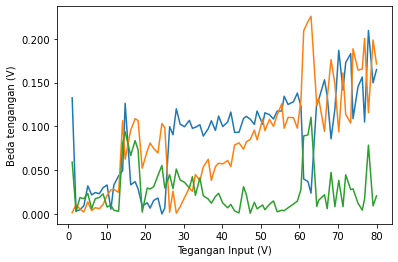

In [195]:
from matplotlib.ticker import FormatStrFormatter,PercentFormatter
fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.plot(Vdata["V multimeter"],Diff_0)
plt.plot(Vdata["V multimeter"],Diff_1)
plt.plot(Vdata["V multimeter"],Diff_2)
plt.xlabel("Tegangan Input (V)")
plt.ylabel("Beda tengangan (V)")

Text(0, 0.5, 'Beda tengangan (V)')

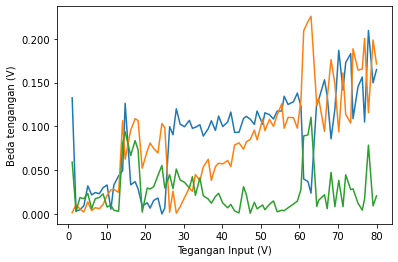

In [196]:
from matplotlib.ticker import FormatStrFormatter,PercentFormatter
fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.plot(Vdata["V multimeter"],Diff_0)
plt.plot(Vdata["V multimeter"],Diff_1)
plt.plot(Vdata["V multimeter"],Diff_2)
plt.xlabel("Tegangan Input (V)")
plt.ylabel("Beda tengangan (V)")

Text(0, 0.5, 'Error bacaan')

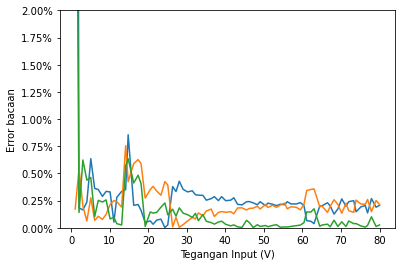

In [197]:
from matplotlib.ticker import FormatStrFormatter,PercentFormatter
fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.plot(Vdata["V multimeter"],Err_0)
plt.plot(Vdata["V multimeter"],Err_1)
plt.plot(Vdata["V multimeter"],Err_2)
plt.ylim(0,2)
ax.yaxis.set_major_formatter(PercentFormatter())
plt.xlabel("Tegangan Input (V)")
plt.ylabel("Error bacaan")

Text(0, 0.5, 'Error bacaan')

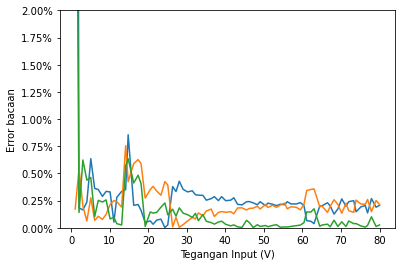

In [198]:
from matplotlib.ticker import FormatStrFormatter,PercentFormatter
fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.plot(Vdata["V multimeter"],Err_0)
plt.plot(Vdata["V multimeter"],Err_1)
plt.plot(Vdata["V multimeter"],Err_2)
plt.ylim(0,2)
ax.yaxis.set_major_formatter(PercentFormatter())
plt.xlabel("Tegangan Input (V)")
plt.ylabel("Error bacaan")

In [199]:
import plotly as ply

In [200]:
gain_list=["1","2","4","8","16"]

In [201]:
len(gain_list)==len(ADC_Range)

True

In [202]:
fig = ply.graph_objects.Figure()
# Create and style traces
for i, val in enumerate(ADC_Range):

    fig.add_trace(ply.graph_objects.Scatter(
        x=Vdata["V multimeter"].iloc[val], y=Vdata["Error 0"].iloc[val], name="ADC 0 x"+gain_list[i]))
    fig.add_trace(ply.graph_objects.Scatter(
        x=Vdata["V multimeter"].iloc[val], y=Vdata["Error 1"].iloc[val], name="ADC 1 x"+gain_list[i]))
    fig.add_trace(ply.graph_objects.Scatter(
        x = Vdata["V multimeter"].iloc[val], y = Vdata["Error 2"].iloc[val], name = "ADC 2 x"+gain_list[i]))

fig.update_layout(title='Error Pengukuran arus pada setiap gain',
                  xaxis_title='Arus (mA)',
                  yaxis_title='Error (%)')
fig.update_yaxes(range=[0, 2])

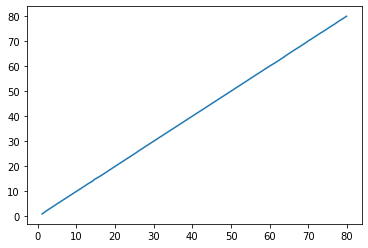

In [203]:
plt.plot(Vdata["ADC 0 Simple"],Vdata["V multimeter"])

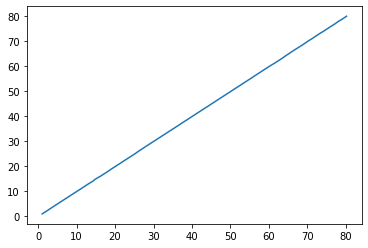

In [204]:
plt.plot(Vdata["ADC 1 Simple"],Vdata["V multimeter"])

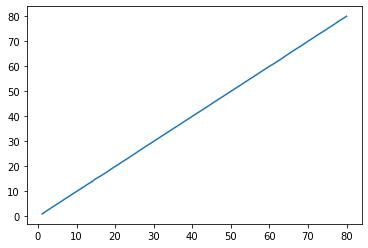

In [205]:
plt.plot(Vdata["ADC 2 Simple"],Vdata["V multimeter"])

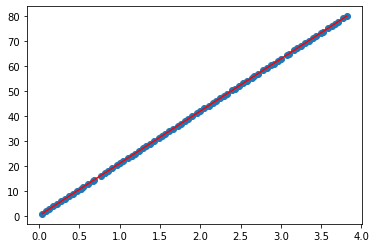

In [206]:
plt.plot(Vdata['ADC 0'], Vdata['V multimeter'], 'o', label='original data')
plt.plot(Vdata['ADC 0'], res_0.intercept + res_0.slope *
         Vdata['ADC 0'], 'r', label='fitted line')


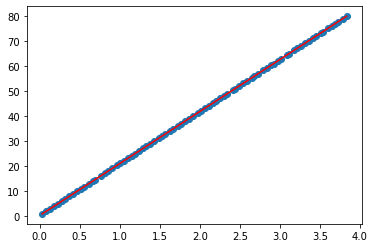

In [207]:
plt.plot(Vdata['ADC 1'], Vdata['V multimeter'], 'o', label='original data')
plt.plot(Vdata['ADC 1'], res_1.intercept + res_1.slope *
         Vdata['ADC 1'], 'r', label='fitted line')


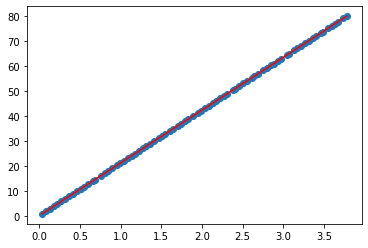

In [208]:
plt.plot(Vdata['ADC 2'], Vdata['V multimeter'], 'o', label='original data')
plt.plot(Vdata['ADC 2'], res_2.intercept + res_2.slope *
         Vdata['ADC 2'], 'r', label='fitted line')


In [209]:
interp_slope = 20.83


In [210]:
#Vdata[['ADC 0','ADC 1']]=Vdata[['ADC 0','ADC 1']]*interp_slope
#Vdata['ADC 2']=Vdata*res_2.slope


In [211]:
Slope_0 = list()
Slope_1 = list()
Slope_2 = list()
Inter_0 = list()
Inter_1 = list()
Inter_2 = list()
for i in ADC_Range:
    data_ADC_0 = stats.linregress(
        Vdata['ADC 0'].iloc[i], Vdata['V multimeter'].iloc[i])
    data_ADC_1 = stats.linregress(
        Vdata['ADC 1'].iloc[i], Vdata['V multimeter'].iloc[i])
    data_ADC_2 = stats.linregress(
        Vdata['ADC 2'].iloc[i], Vdata['V multimeter'].iloc[i])
    Slope_0.append(data_ADC_0.slope)
    Slope_1.append(data_ADC_1.slope)
    Slope_2.append(data_ADC_2.slope)
    Inter_0.append(data_ADC_0.intercept)
    Inter_1.append(data_ADC_1.intercept)
    Inter_2.append(data_ADC_2.intercept)


In [212]:
for i in ADC_Range:
    for j in i:
        

SyntaxError: unexpected EOF while parsing (<ipython-input-212-99fc84ff663e>, line 3)

In [ ]:
for i in range(len(Slope_0)):
    print(Slope_0[i], Inter_0[i])


21.52971172263368 0.25342564408283685
20.89026171203868 0.3657219154952047
20.656761849591607 0.5371283689991451
20.939306206644712 0.28316400728668256
20.86239633870673 0.39429262630227413
